# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
data = pd.read_csv('Sample - Superstore.csv', encoding = 'Latin - 1')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 21)

In [5]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.describe(include = 'object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data['Order month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Days'] = data['Order Date'].dt.dayofweek

In [10]:
month_mapping = {1:'Januray', 2:'Februray', 3:'March',4:'April', 5:'May', 6:'June',7:'July',
                 8:'August',9:'September',10:'October',11:'November',12:'December'}

data['Order month'] = data['Order month'].map(month_mapping)

# Sales Analysis

Sales by Month

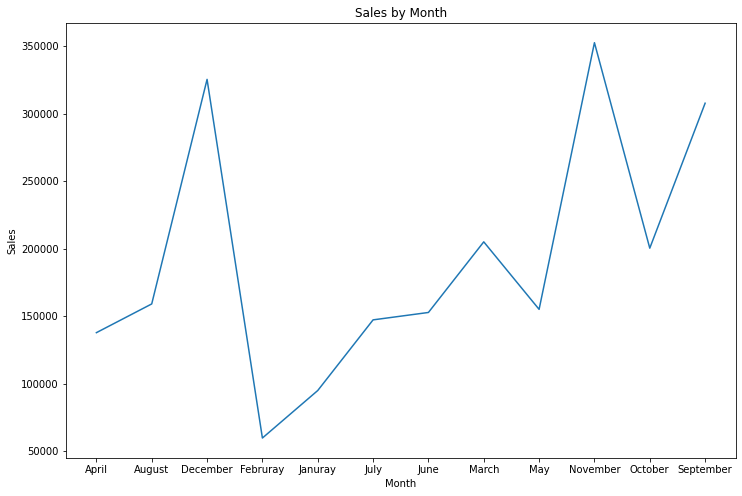

In [11]:
Sales_by_month = data.groupby('Order month')['Sales'].sum().reset_index()

palette = sns.color_palette("pastel")

plt.figure(figsize =(12,8))
# sns.(data = Sales_by_month, x = 'Order month', y = 'Sales', 
#              hue = 'Order month',palette = palette, legend = False)

sns.lineplot(Sales_by_month, x = 'Order month', y = 'Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')

plt.show()

Sales by Category

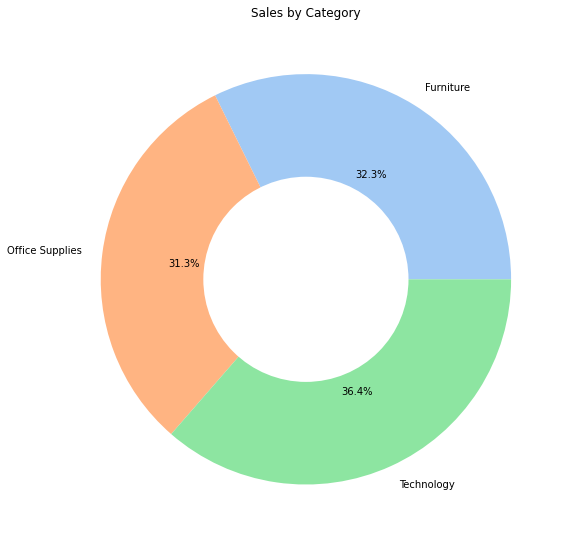

In [12]:
Sales_by_Category = data.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(8,8))
palette = sns.color_palette("pastel")
plt.pie(Sales_by_Category['Sales'],labels = Sales_by_Category['Category'] ,colors = palette, autopct = '%1.1f%%')

center = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center)
plt.tight_layout()
plt.title('Sales by Category')
plt.show()
#labels

sales by sub-category

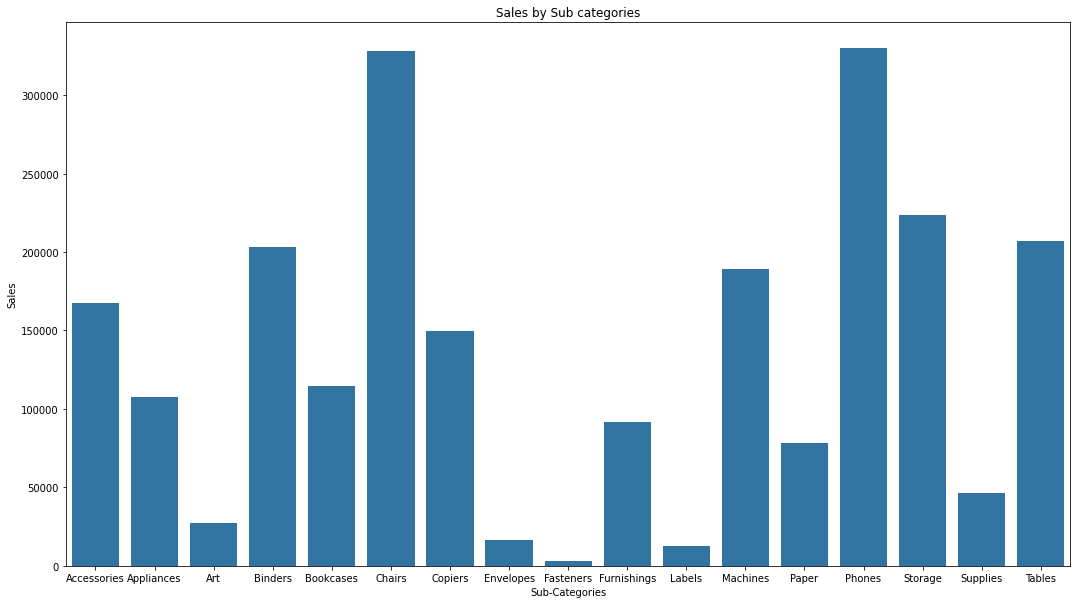

In [13]:
Sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()

plt.figure(figsize=(18,10))
sns.barplot(Sales_by_subcategory, x = 'Sub-Category', y = 'Sales')
plt.xlabel('Sub-Categories')
plt.ylabel('Sales')
plt.title('Sales by Sub categories')

plt.show()

# Profit Analysis

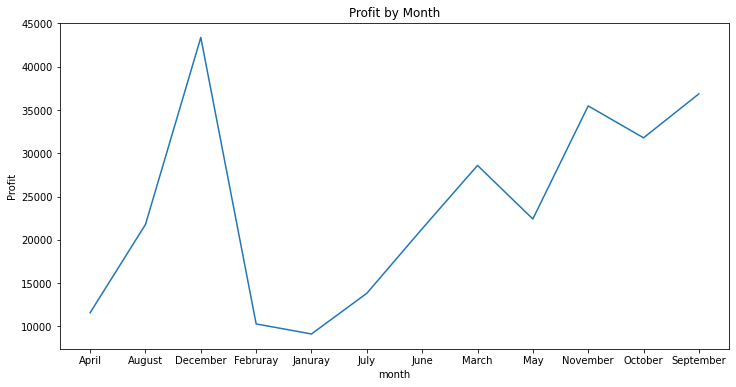

In [14]:
Profitbymonth = data.groupby('Order month')['Profit'].sum().reset_index()

plt.figure(figsize=(12,6))

sns.lineplot(Profitbymonth, x = 'Order month', y='Profit')
plt.xlabel('month')
plt.ylabel('Profit')
plt.title('Profit by Month')

plt.show()

Profit by category

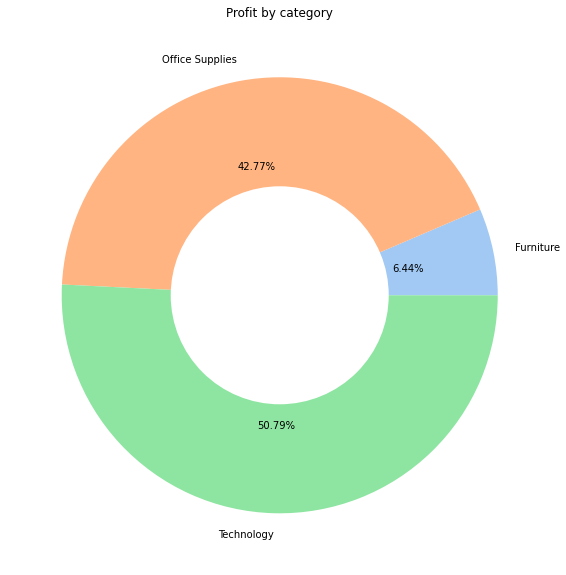

In [15]:
profitbycategory = data.groupby('Category')['Profit'].sum().reset_index()

plt.figure(figsize=(8,8))

plt.pie(profitbycategory['Profit'],labels =profitbycategory['Category'], colors = palette, autopct = '%1.2f%%')

center = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center)
plt.tight_layout()
plt.title('Profit by category')

plt.show()

Profit by sub category

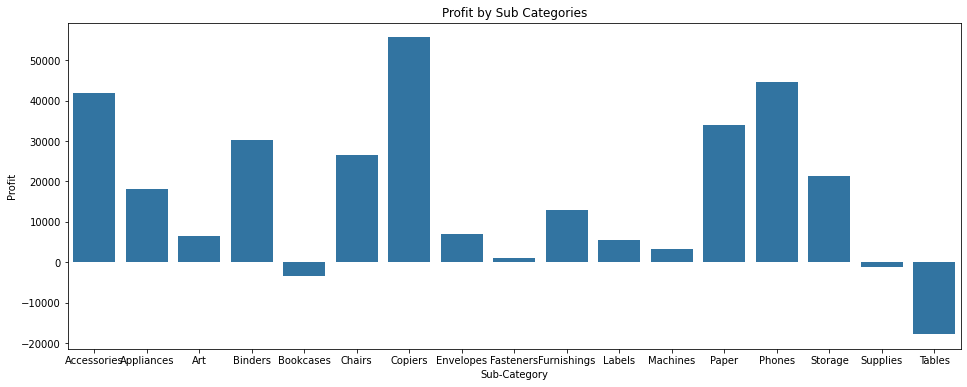

In [16]:
profitsub = data.groupby('Sub-Category')['Profit'].sum().reset_index()

plt.figure(figsize=(16,6))

sns.barplot(profitsub, x = 'Sub-Category', y='Profit')

plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Profit by Sub Categories')

plt.show()

# Sales and Profit by Segment

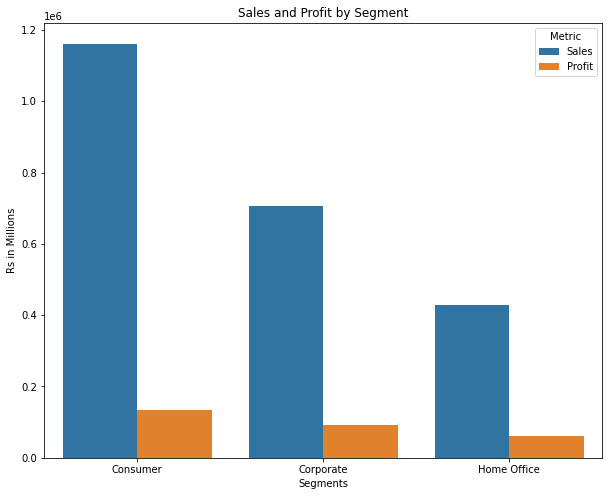

In [17]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
df_long = sales_profit_by_segment.melt(id_vars = 'Segment',var_name='Metric',value_name='Value')

plt.figure(figsize = (10,8))

sns.barplot(df_long, x='Segment',y='Value', hue='Metric')

plt.xlabel('Segments')
plt.ylabel('Rs in Millions')
plt.title('Sales and Profit by Segment')
plt.show()

Sales to profit Ratio

In [18]:
sales_profit_by_segment['Sales to profit ratio']=sales_profit_by_segment['Sales']/sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment','Sales to profit ratio']])

       Segment  Sales to profit ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
